In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

db = config['myaws']['db']
host = config['myaws']['host']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db)

In [4]:
cur = conn.cursor()

In [5]:
# Q3.1

In [6]:
sql = """ select * from student           
"""

In [7]:
df = pandas.read_sql_query(sql, conn)

df[:]

/tmp/ipykernel_15763/3428070827.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [8]:
# Q3.2

In [9]:
sql_2 = """ select professor.p_name,
            course.c_name
            from professor
            inner join course
            on professor.p_email = course.p_email
"""

In [10]:
df = pandas.read_sql_query(sql_2, conn)

df[:]

/tmp/ipykernel_15763/1706949672.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql_2, conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [11]:
#Q 3.3

In [20]:
sql_3 = """
        select c_number,
        count(c_number) as enrolled
        from enroll
        group by c_number
        order by enrolled asc
"""

/tmp/ipykernel_15763/1201595018.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql_3, conn)


<Axes: xlabel='c_number'>

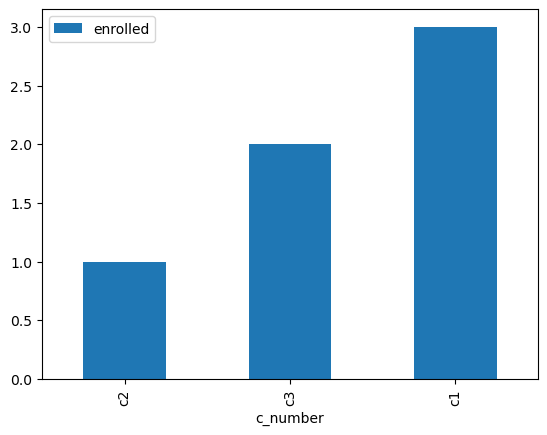

In [21]:
df = pandas.read_sql_query(sql_3, conn)
df.plot.bar(y='enrolled',x='c_number')

In [22]:
#Q 3.4

In [27]:
sql_4 = """
        select professor.p_name,
        count(course.c_name) as teaching_num
        from professor
        inner join course
        on professor.p_email = course.p_email
        group by professor.p_name
        order by teaching_num desc
"""

/tmp/ipykernel_15763/2488019323.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql_4, conn)


<Axes: xlabel='p_name'>

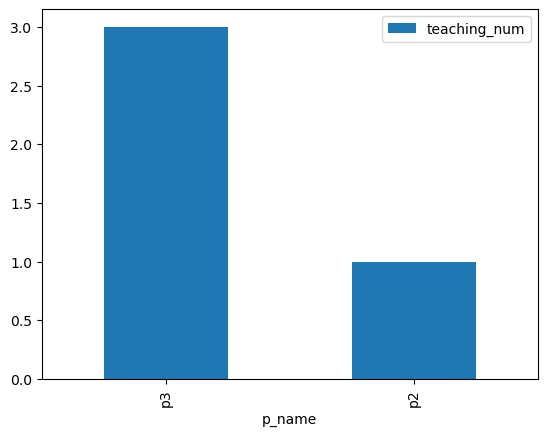

In [28]:
df = pandas.read_sql_query(sql_4, conn)
df.plot.bar(y='teaching_num',x='p_name')

In [ ]:
#Q 3.5

In [44]:
sql_5 = """ insert into professor(p_email, p_name, office)
values('{}','{}','{}')           
""".format('p4@jmu.edu', 'p4', 'o4')

In [45]:
cur.execute(sql_5)

In [46]:
conn.commit()

In [47]:
df = pandas.read_sql_query(' select * from professor', conn)
df[:]

/tmp/ipykernel_15763/664458512.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(' select * from professor', conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [48]:
sql_5_2 = """ insert into course(c_number, c_name, room, p_email)
values('{}','{}','{}', '{}')           
""".format('c5', 'linkedin', 'r2', 'p4@jmu.edu')

In [49]:
cur.execute(sql_5_2)

In [50]:
conn.commit()

In [51]:
df = pandas.read_sql_query(' select * from course', conn)
df[:]

/tmp/ipykernel_15763/817142542.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(' select * from course', conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [ ]:
#Q 3.6

In [52]:
sql_6 = """
        update course
        set p_email = '{}'
        where p_email ='{}'
        """.format('p4@jmu.edu', 'p2@jmu.edu')

In [53]:
cur.execute(sql_6)

In [54]:
conn.commit()

In [55]:
df = pandas.read_sql_query(' select * from course', conn)
df[:]

/tmp/ipykernel_15763/817142542.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(' select * from course', conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [56]:
sql_6_2 = """
        delete from professor
        where p_email ='{}'
        """.format('p2@jmu.edu')

In [57]:
cur.execute(sql_6_2)

In [58]:
conn.commit()

In [59]:
df = pandas.read_sql_query(' select * from professor', conn)
df[:]

/tmp/ipykernel_15763/664458512.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(' select * from professor', conn)


,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [60]:
cur.close()
conn.close()